<a href="https://colab.research.google.com/github/Liang130520/Deep_Learning/blob/main/DeepLearning_1121_3_%E7%89%BD%E5%BC%95%E5%AD%B8%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import zipfile
path = "/content/drive/MyDrive/程式語言/Deep Learning/train.zip"
f = zipfile.ZipFile(path)
f.extractall()

In [41]:
" glob 抓取資料夾內的資料 "
# import glob
# glob.glob("train/*") # 抓取符合在 train 資料夾內的所有資料

' glob 抓取資料夾內的資料 '

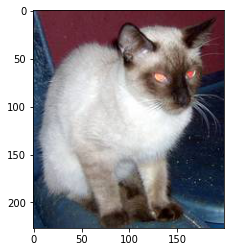

In [42]:
import glob
import matplotlib.pyplot as plt
from PIL import Image
fs = glob.glob("train/*")
plt.imshow(Image.open(fs[5000]))

In [43]:
import random
import pandas as pd
dogs = glob.glob("train/dog.*") # 取得 train 資料夾內 dog.開頭的所有檔案
random.shuffle(dogs) # 打亂順序
cats = glob.glob("train/cat.*") # 取得 train 資料夾內 cat.開頭的所有檔案
random.shuffle(cats) # 打亂順序
train = pd.DataFrame({
    # 取900張 dog, 900張 cat 訓練資料
    "path":dogs[:900] + cats[:900],
    "target":[0] * 900 + [1] * 900
})
validate = pd.DataFrame({
    # 取未使用的50張 dog, 未使用的50張 cat 驗證資料
    "path":dogs[900:950] + cats[900:950],
    "target":[0] * 50 + [1] * 50
})
test = pd.DataFrame({
    # 取末50張 dog, 末50張 cat 測試資料
    "path":dogs[950:1000] + cats[950:1000],
    "target":[0] * 50 + [1] * 50
})

In [44]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import BatchNormalization
for l in vgg.layers:
    # vgg layers 是list, False 是為了讓資料不能被訓練
    l.trainable = False
layers = [
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dense(2, activation="softmax")
]
layers = vgg.layers + layers
model = Sequential(layers)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [46]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [47]:
import numpy as np

In [48]:
(np.array([[1, 2], [3, 4]]) + np.array([[5, 6], [7, 8]])) * 0.5

array([[3., 4.],
       [5., 6.]])

In [49]:
# https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py
fs = glob.glob("train/*")
target = fs[20]

# 預處理(要照你偷來的模型做)
from tensorflow.keras.applications.vgg16 import preprocess_input
img = Image.open(target).resize((224, 224)).convert("RGB")
# 須依循 VGG16 內建的預處理方式才能順利進行
img_np = preprocess_input(np.array(img))
print(img_np)

[[[ 6.406100e+01  8.822100e+01  9.532000e+01]
  [ 6.506100e+01  8.922100e+01  9.632000e+01]
  [ 6.706100e+01  9.122100e+01  9.832000e+01]
  ...
  [-1.939003e+00  3.922100e+01  6.232000e+01]
  [-9.390030e-01  3.822100e+01  6.132000e+01]
  [ 2.060997e+00  3.622100e+01  6.032000e+01]]

 [[ 6.706100e+01  9.022100e+01  9.732000e+01]
  [ 6.506100e+01  8.722100e+01  9.432000e+01]
  [ 6.506100e+01  8.722100e+01  9.432000e+01]
  ...
  [ 6.099701e-02  4.122100e+01  6.532000e+01]
  [ 1.060997e+00  4.122100e+01  6.532000e+01]
  [ 2.060997e+00  3.822100e+01  6.232000e+01]]

 [[ 6.506100e+01  8.722100e+01  9.432000e+01]
  [ 6.406100e+01  8.622100e+01  9.332000e+01]
  [ 6.806100e+01  9.022100e+01  9.732000e+01]
  ...
  [-9.390030e-01  4.022100e+01  6.432000e+01]
  [ 6.099701e-02  4.022100e+01  6.432000e+01]
  [ 2.060997e+00  3.822100e+01  6.332000e+01]]

 ...

 [[ 1.130610e+02  1.122210e+02  1.093200e+02]
  [ 1.140610e+02  1.132210e+02  1.103200e+02]
  [ 1.150610e+02  1.142210e+02  1.113200e+02]
  ..

In [50]:
# 不用fit: fit_generator/自己寫
from functools import lru_cache
@lru_cache(maxsize=None)
def fib(n):
  if n == 0:
    return 0
  elif n == 1:
    return 1
  else:
    ans = fib(n-1) + fib(n-2)
    return ans
fib(200)

280571172992510140037611932413038677189525

In [51]:
# 自己寫training/validate
import numpy as np
x_train = np.array(train["path"])
y_train = np.array(train["target"])
x_validate = np.array(validate["path"])
y_validate = np.array(validate["target"])
x_test = np.array(test["path"])
y_test = np.array(test["target"])

In [52]:
# 如果不先讀取圖片: fit_generator / train_on_batch(較推薦)

In [53]:
" 自己操作的預處理 "
from PIL import Image
from tensorflow.keras.applications.vgg16 import preprocess_input
def get_data(x, y, batch=None):
    # 如果不是None, 那代表是數字(if = 20, 隨機20個idx)
    # 如果是None, 那就沒有隨機, 全部都讀取
    if batch is not None:
        # np.random.randint(0, 3) -> 0-2 隨機, 為 exclusive 數值
        idx = np.random.randint(0, len(x), size=batch)
        x, y = x[idx], y[idx]
    # img_pre: preprocess過後的圖片
    # img_ori: 沒有preprocess的圖片
    img_pre, img_ori = [], []
    # 走過我的每一個path
    for p in x:
        # 讀取圖片並且預處理
        img = Image.open(p).convert("RGB").resize((224, 224))
        img = np.array(img)
        img_pre.append(preprocess_input(img))
        img_ori.append(img)
    # 回傳(預處理過後圖片, 沒處理圖片, 答案)
    return (np.array(img_pre), np.array(img_ori), y)
# 使用範例
x, x_ori, y = get_data(x_train, y_train, 10)
print(x.shape)
print(x_ori.shape)
print(y.shape)
# print(x)

(10, 224, 224, 3)
(10, 224, 224, 3)
(10,)


In [54]:
# validate和test全部讀出來
xv, xv_ori, yv = get_data(x_validate, y_validate)
xt, xt_ori, yt = get_data(x_test, y_test)
print(xv.shape)
print(xt.shape)

(100, 224, 224, 3)
(100, 224, 224, 3)


In [66]:
# 我沒有使用fit: 因為使用fit你一定要把全部圖都讀好(現實世界不太可能)
# 真的自己一步一步來: train_on_batch, test_on_batch
for i in range(50):
    # 因為只需要處理過的圖 & 答案, 無須原圖, 故以 _ 代表不重要的項目
    x, _, y = get_data(x_train, y_train, batch=20)
    result = model.train_on_batch(x, y)
    print("train:", result)
    result = model.test_on_batch(xv, yv)
    print("validate:", result)
    print("-" * 15, i, "end", "-" * 15)

train: [0.32791867852211, 0.8500000238418579]
validate: [0.14703066647052765, 0.9599999785423279]
--------------- 0 end ---------------
train: [0.13319824635982513, 0.949999988079071]
validate: [0.1463761031627655, 0.9599999785423279]
--------------- 1 end ---------------
train: [0.1129685640335083, 1.0]
validate: [0.14545583724975586, 0.9599999785423279]
--------------- 2 end ---------------
train: [0.11174585670232773, 0.949999988079071]
validate: [0.14474160969257355, 0.9599999785423279]
--------------- 3 end ---------------
train: [0.3163323700428009, 0.8999999761581421]
validate: [0.14392346143722534, 0.9599999785423279]
--------------- 4 end ---------------
train: [0.2809441387653351, 0.8999999761581421]
validate: [0.1432800441980362, 0.9599999785423279]
--------------- 5 end ---------------
train: [0.1364464908838272, 0.949999988079071]
validate: [0.14288218319416046, 0.9599999785423279]
--------------- 6 end ---------------
train: [0.09594549238681793, 1.0]
validate: [0.1422854

In [67]:
model.predict(x)

1/1 [==============================] - 0s 27ms/step


array([[2.04066653e-02, 9.79593277e-01],
       [9.91733074e-01, 8.26691743e-03],
       [9.83053505e-01, 1.69464275e-02],
       [9.94840682e-01, 5.15927002e-03],
       [1.48981297e-02, 9.85101819e-01],
       [9.77074862e-01, 2.29251254e-02],
       [8.90476644e-01, 1.09523311e-01],
       [1.24598227e-01, 8.75401735e-01],
       [5.78240529e-02, 9.42175925e-01],
       [2.55679386e-03, 9.97443199e-01],
       [9.94598627e-01, 5.40140504e-03],
       [9.97832716e-01, 2.16727215e-03],
       [9.86123443e-01, 1.38765825e-02],
       [3.36585427e-03, 9.96634185e-01],
       [2.17294451e-02, 9.78270531e-01],
       [9.76632595e-01, 2.33673938e-02],
       [9.99987245e-01, 1.27601252e-05],
       [7.72247791e-01, 2.27752253e-01],
       [9.99964237e-01, 3.57427925e-05],
       [8.28035653e-01, 1.71964392e-01]], dtype=float32)

In [68]:
pre = model.predict(xt).argmax(axis=1)
model.evaluate(xt, yt)

4/4 [==============================] - 0s 100ms/step - loss: 0.1080 - accuracy: 0.9700


[0.10804679244756699, 0.9700000286102295]

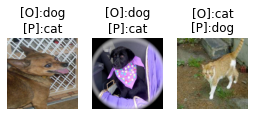

In [69]:
import numpy as np
# 找出True(預測錯誤)的位置
idx = np.nonzero(pre != yt)[0]
idx = idx[:200]
pre_false_label = yt[idx]
pre_false_pre = pre[idx]
pre_false_img = xt_ori[idx]
# !
trans = ["dog", "cat"]
plt.figure(figsize=(15, 5))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[pre_false_label[i]], trans[pre_false_pre[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])

In [ ]:
import requests
# pillow
from PIL import Image
url = input("url:")
response = requests.get(url, stream=True)
img = Image.open(response.raw).convert("RGB").resize((224, 224))
img_np = np.array(img).reshape(1, 224, 224, 3)
# (32, 32, 3) -> (1, 32, 32, 3)
img_np_pre = preprocess_input(img_np)
proba = model.predict(img_np_pre)[0]
for p, n in zip(proba, trans):
    print(n, "的機率:", round(p, 3))
plt.imshow(img)

# 牽引學習

# 重點
# 1.跟偷來的preprocess/size一樣
# 2.偷來的資料需固定, 且記得正規化
    # if 轉換資料不同(caffe, tf, torch), 易造成
        # 1. loss過大或亂飄 
        # 2. accuracy:出現 1.0000 + 1e, 代表離答案即遠, 處在極右邊的 x
    # 解決辦法：Batch Normalization
        # 時機:隨時皆可操作, 可用於Conv -> Conv
        # 做標準化, 將各個平均變成 0, 標準差 -1 ~ 1 之間
        # 再做成 P'' = P' * B + R [為取得更好的參數, 減掉及除掉的弄回來], 同等於 R下 = R現 + (- dloss / dr1) * 步數常數 
# 3.少量 Data 造就極好 result
